<a href="https://colab.research.google.com/github/FractalCrab/Sorting/blob/master/E19CSE247_LabPractice1_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Practice Session 1</h1>


Estimated time needed: **30** minutes


<h2>Objectives</h2>


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",)

Mounted at /content/gdrive


In today's lab, you will apply geometric transformations and other operations to an image. The questions are written in bold, mention their corresponding answers below them.


In [27]:
import os
import sys
os.chdir('/content/gdrive/MyDrive')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/MyDrive
/content/gdrive/MyDrive


**Download any image for the lab and save it to your drive folder.** 


We will import the following:


In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

First, let's define a helper function to plot  image on colab. This function will be used repeatedly in this notebook to showcase the results.


In [24]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

#Geometric Transformations


Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.


## Scaling


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


**Create a grayscale image of size 6x6, Set Boundary Pixels to Black and Remaining Pixels to white. Display the Image.**

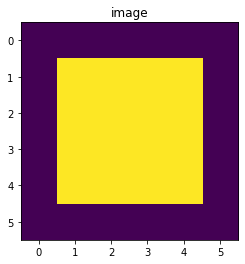

In [33]:
image_height = 6
image_width = 6

gray_scale_img = np.zeros((image_height, image_width))
for i in range(image_height):
  for j in range(image_width):
    if (i == 0 or j == 0) or i == image_height-1 or j == image_width-1:
      gray_scale_img[i][j] = 0
    else:
      gray_scale_img[i][j] = 255

plt_imshow("image", gray_scale_img)

We can rescale along a specific axis:

*   `fx`: scale factor along the horizontal axis
*   `fy`: scale factor along the vertical axis


**Resize the above image using the nearest pixel interpolation. Resize the image with scale factor 1 along vertical axis and 2 along horizontal axis. Display the resultant image.**

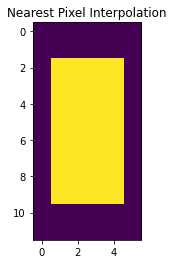

In [34]:
near_img = cv2.resize(gray_scale_img, None, fx = 1, fy = 2, interpolation = cv2.INTER_NEAREST)
plt_imshow("Nearest Pixel Interpolation", near_img)

**Upload an image of your choice and display it here.**

In [28]:

args = {
	"image": "4xji4r.jpg",
}

In [29]:

image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 500 pixels
height: 756  pixels
channels: 3


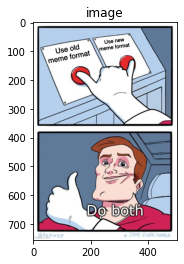

True

In [30]:

plt_imshow("image", image)


cv2.imwrite("minionew.png", image)

**Scale the horizontal axis by two and leave the vertical axis as is. Use inter cubic interpolation.**


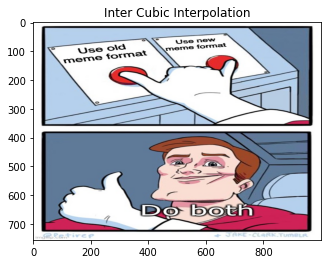

In [35]:
inter_cubic_interpolation = cv2.resize(image, None, fx = 2, fy = 1, interpolation = cv2.INTER_CUBIC)
plt_imshow("Inter Cubic Interpolation", inter_cubic_interpolation)

**Now scale the vertical axis by four.**


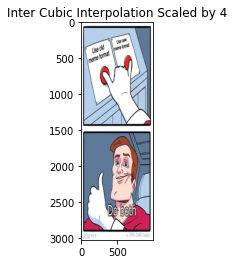

In [36]:
inter_cubic_interpolation_vertical_scaled_by_four = cv2.resize(inter_cubic_interpolation, None, fx = 1, fy = 4, interpolation = cv2.INTER_CUBIC)
plt_imshow("Inter Cubic Interpolation Scaled by 4", inter_cubic_interpolation_vertical_scaled_by_four)

**Shrink the image by setting the scaling factor to a real number between 0 and 1.**


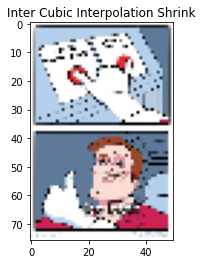

In [38]:
inter_cubic_interpolation_shrink = cv2.resize(image, None, fx = 0.1, fy = 0.1, interpolation = cv2.INTER_CUBIC)
plt_imshow("Inter Cubic Interpolation Shrink", inter_cubic_interpolation_shrink)

**Instead of using scaling factors, specify the number of rows and columns of the resultant image and resize. Display both original and resized image.**


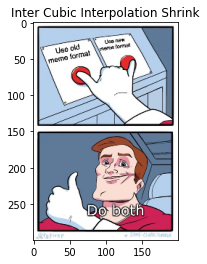

In [39]:
inter_cubic_interpolation_shrink_hardcoded = cv2.resize(image, (200,300), interpolation = cv2.INTER_CUBIC)
plt_imshow("Inter Cubic Interpolation Shrink", inter_cubic_interpolation_shrink_hardcoded)

## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

**Upload an image and shift the image 100 pixels horizontally by constructing transformation matrix.**


In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

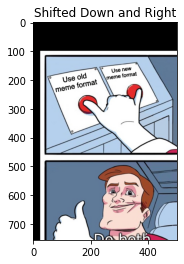

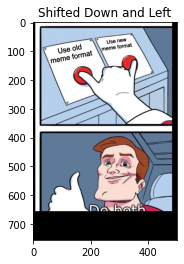

In [32]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
# plt_imshow("", image)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 100]])
shifted = cv2.warpAffine( image,M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)
M1 = np.float32([[1, 0, -17], [0, 1, -100]])
newshifted = cv2.warpAffine(shifted, M1, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Left", newshifted)

## Rotation


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


**Rotate your uploaded image by 45 degrees.**


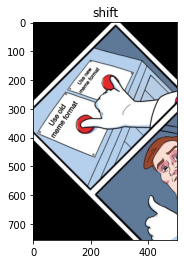

In [41]:
img = image
h,w=img.shape[:2]
transform_matrix = cv2.getRotationMatrix2D((h/2, w/2), 45, 1)
shift1=cv2.warpAffine(img, transform_matrix,(w,h))
plt_imshow("shift", shift1)

## Other Mathematical Operations

**Upload an image and increase the brightness of the image by applying any suitable mathematical operation. Display the original and brihtened image.**


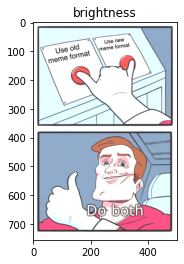

In [43]:
img = image
img = cv2.add(img, np.ones(img.shape, dtype="uint8")*50)
plt_imshow("brightness", img)

**Generate an array of random noises with the same shape and data type as your input image. This noise array can contain any random values.**


In [44]:
noise = np.random.randint(0, high=255, size=img.shape, dtype='uint8')
noise

array([[[102,  59, 100],
        [ 18, 172,   9],
        [ 16,  85, 186],
        ...,
        [ 62, 194,  15],
        [ 43, 223,  35],
        [ 79, 199, 122]],

       [[176, 111,  34],
        [105, 181,  92],
        [122,  41, 235],
        ...,
        [226, 145, 158],
        [209,  55,  90],
        [202,   3,  16]],

       [[ 56,  62, 231],
        [156, 194,  16],
        [233, 152, 133],
        ...,
        [122, 178, 170],
        [124, 132, 218],
        [147, 229, 233]],

       ...,

       [[188, 178, 235],
        [106,  18, 172],
        [127,   1,  86],
        ...,
        [106, 188,  17],
        [143, 225, 145],
        [155, 178,  92]],

       [[214,  35, 187],
        [254, 105,  52],
        [ 58,   7, 169],
        ...,
        [108, 232,  41],
        [182, 236, 244],
        [ 82,  21, 148]],

       [[186,  49, 156],
        [ 80, 148,  37],
        [146, 176, 107],
        ...,
        [245, 142,  76],
        [ 31, 178, 110],
        [185, 242, 138]]

**Add the generated noise to the image and plot the result. Observe the original and corrupted image.**


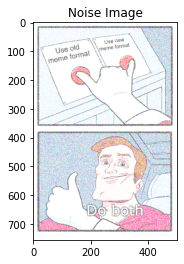

In [46]:
noise_image = cv2.add(noise, image)
plt_imshow("Noise Image", noise_image)